# **Data Cleaning**

In [ ]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [00:28<00:00, 76.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [ ]:
import os
import numpy as np
from PIL import Image

# Path to the dataset folder
dataset_path = path

# Function to clean and process images
def process_images(folder):
    images = []
    labels = []
    # Access the global dataset_path variable
    global dataset_path

    # Check if 'dataset_path' is a file and extract directory if needed
    if os.path.isfile(dataset_path):
        dataset_path = os.path.dirname(dataset_path) # Extract directory path

    # Update folder path with the extracted directory path
    folder = os.path.join(dataset_path, folder)

    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for image_file in os.listdir(label_folder):
                image_path = os.path.join(label_folder, image_file)

                # Read the image
                image = Image.open(image_path)

                # Resize the image
                image = image.resize((128, 128))

                # Ensure all images are converted to RGB
                image = image.convert('RGB')

                # Convert the image to a NumPy array and normalize
                image_array = np.array(image) / 255.0

                images.append(image_array)
                labels.append(label)

    return np.array(images), np.array(labels)

# Assuming the dataset has a folder called 'train' instead of 'Train'
# Process images from the training folder, update folder name if needed
train_images, train_labels = process_images('train') # Changed 'Train' to 'train'
print(f'Processed {len(train_images)} training images.')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processed 3115 training images.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat generator untuk augmentasi gambar
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Contoh untuk augmentasi gambar
sample_image = train_images[0].reshape((1, 128, 128, 3))  # Mengubah bentuk menjadi (1, 128, 128, 3)

# Create the 'augmented_images' directory if it doesn't exist
if not os.path.exists('augmented_images'):
    os.makedirs('augmented_images')

# Menyimpan gambar yang telah diaugmentasi
i = 0
for batch in datagen.flow(sample_image, batch_size=1, save_to_dir='augmented_images', save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 20:  # Menghasilkan 20 gambar augmentasi
        break

# **Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat generator untuk augmentasi gambar
datagen = ImageDataGenerator(
    rotation_range=40,          # Rotasi hingga 40 derajat
    width_shift_range=0.2,      # Pergeseran horizontal hingga 20%
    height_shift_range=0.2,     # Pergeseran vertikal hingga 20%
    shear_range=0.2,            # Shear transformasi hingga 20%
    zoom_range=0.2,             # Zoom in/out hingga 20%
    horizontal_flip=True,       # Membalik gambar secara horizontal
    fill_mode='nearest'         # Menambahkan piksel dengan metode 'nearest'
)

# Contoh augmentasi pada satu gambar dari dataset
# Misalnya, mengambil gambar pertama dari train_images
sample_image = train_images[0].reshape((1, 128, 128, 3))  # Sesuaikan ukuran gambar sesuai kebutuhan

# Menyimpan gambar augmentasi di folder tertentu
i = 0
for batch in datagen.flow(sample_image, batch_size=1, save_to_dir='augmented_images', save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 20:  # Menghasilkan 20 gambar augmentasi
        break


# **Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'train_images' and 'train_labels' contain the entire dataset initially:
images = train_images  # Assign 'train_images' to 'images' to represent the full dataset
labels = train_labels  # Assign 'train_labels' to 'labels' to represent the full dataset labels

# Membagi dataset menjadi data pelatihan (train+validation) dan pengujian (test)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Membagi lagi train set menjadi data pelatihan dan validasi
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

# Hasil akhir
print(f'Train set: {len(train_images)} images')
print(f'Validation set: {len(val_images)} images')
print(f'Test set: {len(test_images)} images')

Train set: 1869 images
Validation set: 623 images
Test set: 623 images


# **Model Selection**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Inisialisasi model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # Sesuaikan dengan jumlah kelas yang ada
])

# Ringkasan arsitektur model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 30)                  │           3,870 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,308,510 (12.62 MB)

 Trainable params: 3,308,510 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for model creation and compilation) ...

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to ALL your labels before splitting
# This ensures consistent encoding across train, validation, and test sets.
label_encoder.fit(labels)  # 'labels' represents the full dataset labels

# Transform the labels for each set
train_labels_encoded = label_encoder.transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)  # Encode test labels as well

# Ensure the number of classes in your model matches the encoded labels
num_classes = len(label_encoder.classes_)  # Get the actual number of classes

# Update the final Dense layer BEFORE compiling the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax') # Update with the correct num_classes
])

# Compile the model (if you haven't already)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
history = model.fit(
    train_images, train_labels_encoded,
    epochs=20,
    batch_size=32,
    validation_data=(val_images, val_labels_encoded)
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 61s 997ms/step - accuracy: 0.0317 - loss: 3.6801 - val_accuracy: 0.0610 - val_loss: 3.4701
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.0798 - loss: 3.4161 - val_accuracy: 0.1396 - val_loss: 3.0989
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 75s 997ms/step - accuracy: 0.1126 - loss: 3.1383 - val_accuracy: 0.1766 - val_loss: 2.8646
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 81s 979ms/step - accuracy: 0.1743 - loss: 2.8763 - val_accuracy: 0.2022 - val_loss: 2.7411
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.2118 - loss: 2.7318 - val_accuracy: 0.2665 - val_loss: 2.5763
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 59s 996ms/step - accuracy: 0.2644 - loss: 2.5104 - val_accuracy: 0.2729 - val_loss: 2.4886
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.2903 - loss: 2.4295 - val_accuracy: 0.2857 - val_loss: 2.5507
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3376 - loss: 2.1941 - val_accuracy: 0.2809

# **Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for model creation and compilation) ...

# Assuming label_encoder was fitted during training:
test_labels_encoded = label_encoder.transform(test_labels)

# Evaluasi model pada test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)  # Use encoded labels for evaluation
print(f'Test accuracy: {test_accuracy:.2f}')

# Prediksi pada test set
y_pred = np.argmax(model.predict(test_images), axis=1)

# Laporan klasifikasi
# For classification_report, use original labels
print(classification_report(test_labels, label_encoder.inverse_transform(y_pred)))  # Decode predictions for report

# Confusion Matrix
# For confusion_matrix, use original labels
conf_matrix = confusion_matrix(test_labels, label_encoder.inverse_transform(y_pred))  # Decode predictions for matrix
print('Confusion Matrix:')
print(conf_matrix)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 0.3365 - loss: 2.9963
Test accuracy: 0.36
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step
               precision    recall  f1-score   support

        apple       0.00      0.00      0.00        13
       banana       0.50      0.06      0.11        17
     beetroot       0.42      0.31      0.36        16
  bell pepper       0.27      0.16      0.20        25
      cabbage       0.46      0.52      0.49        21
     capsicum       0.07      0.07      0.07        15
       carrot       0.47      0.58      0.52        12
  cauliflower       0.67      0.33      0.44        18
chilli pepper       0.43      0.29      0.34        21
         corn       0.44      0.27      0.33        15
     cucumber       0.42      0.25      0.31        20
     eggplant       0.43      0.60      0.50        15
       garlic       0.36      0.56      0.44        16
       ginger       0.57      0.25      0.35        16
       grapes       0.73      0.38    

# **Evaluation on Test Data**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# --- Model definition (copied from Model Training cell) ---
# Assuming you have defined 'num_classes' in a previous cell
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Changed 'train' to 'softmax'
])

# Assuming 'label_encoder', 'train_images', 'train_labels_encoded',
# 'val_images', 'val_labels_encoded' are defined in previous cells

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels_encoded,
    epochs=20,  # Adjust as needed
    batch_size=32,
    validation_data=(val_images, val_labels_encoded)
)
# --- End of model definition ---

# Now you can proceed with the evaluation
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded) # Assuming test_labels_encoded is defined
print(f"Test Accuracy: {test_accuracy:.2f}")

# ... (rest of your evaluation code) ...

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.0421 - loss: 3.5837 - val_accuracy: 0.0867 - val_loss: 3.3094
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.0975 - loss: 3.2979 - val_accuracy: 0.1669 - val_loss: 2.9618
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 81s 990ms/step - accuracy: 0.1533 - loss: 2.9734 - val_accuracy: 0.2071 - val_loss: 2.7977
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.1966 - loss: 2.7615 - val_accuracy: 0.2568 - val_loss: 2.4995
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2548 - loss: 2.5163 - val_accuracy: 0.2295 - val_loss: 2.5397
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 78s 969ms/step - accuracy: 0.2981 - loss: 2.3556 - val_accuracy: 0.3114 - val_loss: 2.3288
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.3472 - loss: 2.1773 - val_accuracy: 0.3178 - val_loss: 2.3133
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.3879 - loss: 2.0565 - val_accuracy: 0.3162 - val

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - accuracy: 0.3826 - loss: 2.9358
Test Accuracy: 0.40
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step

Classification Report:
               precision    recall  f1-score   support

        apple       0.25      0.15      0.19        13
       banana       0.75      0.35      0.48        17
     beetroot       0.57      0.25      0.35        16
  bell pepper       0.27      0.16      0.20        25
      cabbage       0.37      0.52      0.43        21
     capsicum       0.29      0.27      0.28        15
       carrot       0.47      0.58      0.52        12
  cauliflower       0.45      0.56      0.50        18
chilli pepper       0.35      0.33      0.34        21
         corn       0.24      0.40      0.30        15
     cucumber       0.38      0.15      0.21        20
     eggplant       0.50      0.40      0.44        15
       garlic       0.44      0.69      0.54        16
       ginger       0.50      0.31      0.38        16
       grapes 

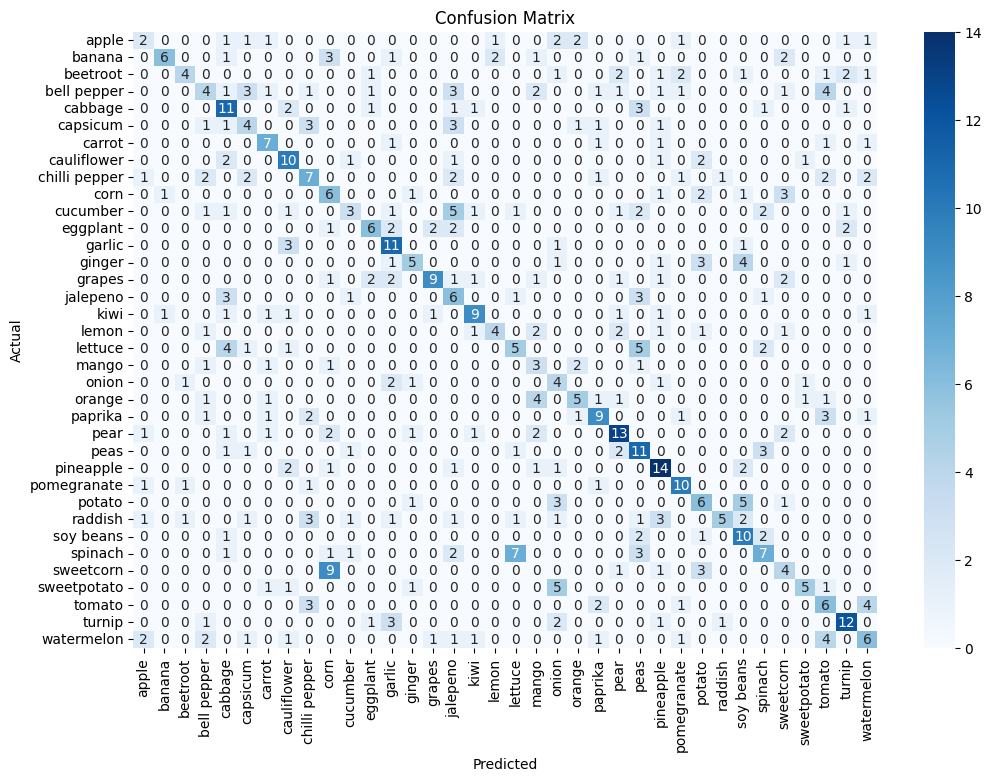

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (Your existing code for model creation and compilation) ...

# Assuming label_encoder was fitted during training:
test_labels_encoded = label_encoder.transform(test_labels) # Encode test labels before evaluation

# Evaluasi pada test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)  # Use encoded labels for evaluation
print(f"Test Accuracy: {test_accuracy:.2f}")

# Prediksi pada test set
y_pred = np.argmax(model.predict(test_images), axis=1)

# For classification_report and confusion_matrix, decode predictions back to original labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Laporan klasifikasi
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_decoded))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, y_pred_decoded)

# Visualisasi Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_) # Use label_encoder.classes_ for tick labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **Result Analysis**

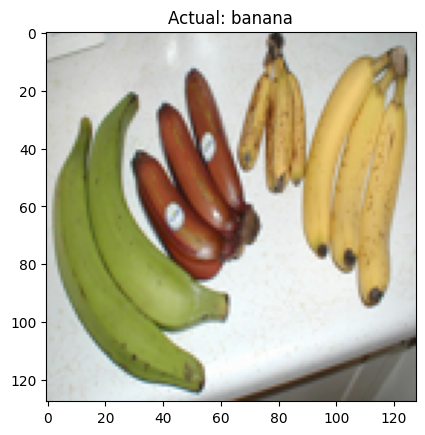

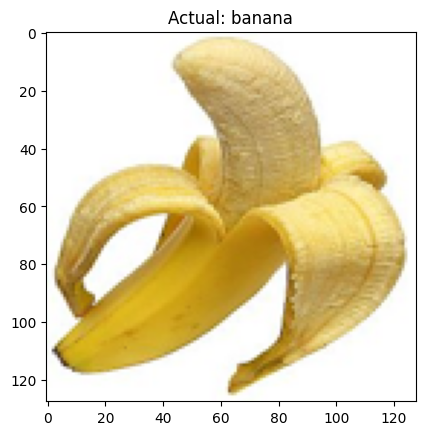

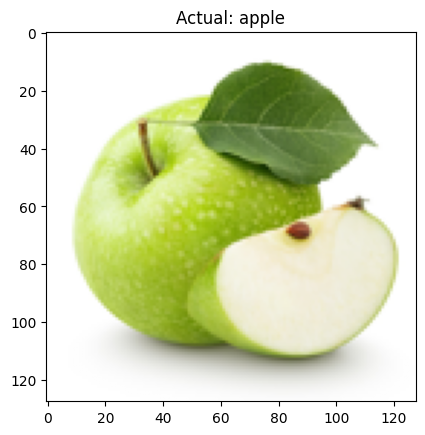

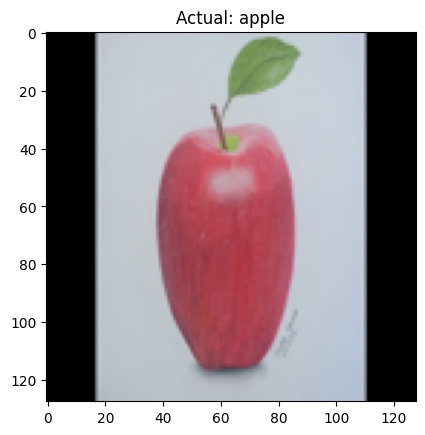

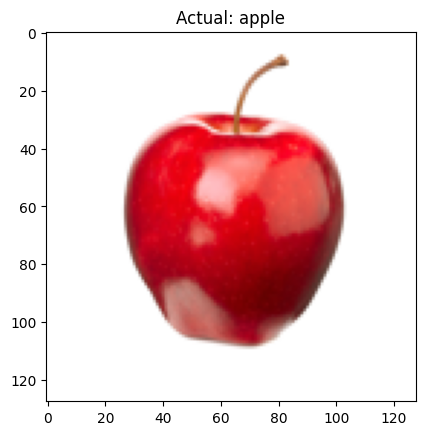

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'label_encoder' is defined from your training process
class_names = label_encoder.classes_  # Get class names from LabelEncoder

# Cari indeks gambar dengan label "banana" dan "apple"
banana_indices = np.where(test_labels == 'banana')[0]
apple_indices = np.where(test_labels == 'apple')[0]

# Gabungkan indeks dan acak
selected_indices = np.concatenate([banana_indices, apple_indices])
random.shuffle(selected_indices)

# Batasi jumlah gambar yang ditampilkan (misalnya, 5)
selected_indices = selected_indices[:5]

# Tampilkan gambar yang dipilih
for i in selected_indices:
    plt.imshow(test_images[i])
    plt.title(f"Actual: {test_labels[i]}") # Tampilkan label sebenarnya
    plt.show()